In [4]:
import pandas
import json
import dataset_preprocess

dataset = dataset_preprocess.get_data_frame()
print("CSV Read Completed...")

CSV Read Completed...


In [31]:
from sklearn import model_selection

# Split-out validation dataset
array = dataset.values
X = array[:, 0:404]
Y = array[:, 404]
# validation_size = 0.2
validation_size = 0.2
# validation_size = 0.5
# validation_size = 0.01
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=seed)
# X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y,random_state=seed)


print("Training Completed")


Training Completed


LR: 0.000000 (0.000000)
KNN: 0.000000 (0.000000)
CART: 0.000000 (0.000000)
NB: 0.000000 (0.000000)
SVM: 0.000000 (0.000000)


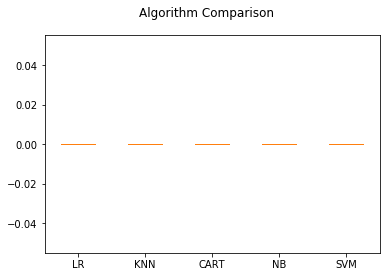

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Test options and evaluation metric
scoring = 'accuracy'

# Spot Check Algorithms
models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')), 
          # ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()),
          ('SVM', SVC(gamma='auto'))]

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [25]:
# Make predictions on validation dataset
knn = LogisticRegression(solver='liblinear', multi_class='ovr')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                     precision    recall  f1-score   support

                Alzheimer's disease       0.00      0.00      0.00         0
                                HIV       0.00      0.00      0.00         0
           accident cerebrovascular       0.00      0.00      0.00         0
                            aphasia       0.00      0.00      0.00         1
                             asthma       0.00      0.00      0.00         1
                         bacteremia       0.00      0.00      0.00         1
                   biliary calculus       0.00      0.00      0.00         1
                   carcinoma breast       0.00      0.00      0.00         1
                 carcinoma prostate       0.00      0.00      0.00         1
                     cardiomyopathy       0.00      0.00      0.00         0
                         cel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
# Make predictions on validation dataset
# knn = LinearDiscriminantAnalysis()
# knn.fit(X_train, Y_train)
# predictions = knn.predict(X_validation)
# print(accuracy_score(Y_validation, predictions))
# print(confusion_matrix(Y_validation, predictions))
# print(classification_report(Y_validation, predictions))


ValueError: The number of samples must be more than the number of classes.

In [27]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                     precision    recall  f1-score   support

                                HIV       0.00      0.00      0.00         0
           accident cerebrovascular       0.00      0.00      0.00         0
                      affect labile       0.00      0.00      0.00         0
                      anxiety state       0.00      0.00      0.00         0
                            aphasia       0.00      0.00      0.00         1
                          arthritis       0.00      0.00      0.00         0
                             asthma       0.00      0.00      0.00         1
                         bacteremia       0.00      0.00      0.00         1
       benign prostatic hypertrophy       0.00      0.00      0.00         0
                   biliary calculus       0.00      0.00      0.00         1
                   carcinoma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
# Make predictions on validation dataset
knn = DecisionTreeClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
                                     precision    recall  f1-score   support

                                HIV       0.00      0.00      0.00         0
           accident cerebrovascular       0.00      0.00      0.00         0
                            aphasia       0.00      0.00      0.00         1
                          arthritis       0.00      0.00      0.00         0
                             asthma       0.00      0.00      0.00         1
                         bacteremia       0.00      0.00      0.00         1
                   biliary calculus       0.00      0.00      0.00         1
                   carcinoma breast       0.00      0.00      0.00         1
                  carcinoma of lung       0.00      0.00      0.00         0
                 carcinoma prostate       0.00      0.00      0.00         1
                         cel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [29]:
# Make predictions on validation dataset
knn = GaussianNB()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                     precision    recall  f1-score   support

                                HIV       0.00      0.00      0.00         0
           accident cerebrovascular       0.00      0.00      0.00         0
                            aphasia       0.00      0.00      0.00         1
                             asthma       0.00      0.00      0.00         1
                         bacteremia       0.00      0.00      0.00         1
                   biliary calculus       0.00      0.00      0.00         1
                   carcinoma breast       0.00      0.00      0.00         1
                 carcinoma prostate       0.00      0.00      0.00         1
                     cardiomyopathy       0.00      0.00      0.00         0
                         cellulitis       0.00      0.00      0.00         1
                     choleli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [30]:
# Make predictions on validation dataset
knn = SVC(gamma='auto')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                     precision    recall  f1-score   support

           accident cerebrovascular       0.00      0.00      0.00         0
acquired immuno-deficiency syndrome       0.00      0.00      0.00         0
                            aphasia       0.00      0.00      0.00         1
                             asthma       0.00      0.00      0.00         1
                         bacteremia       0.00      0.00      0.00         1
                   biliary calculus       0.00      0.00      0.00         1
                   carcinoma breast       0.00      0.00      0.00         1
                 carcinoma prostate       0.00      0.00      0.00         1
                     cardiomyopathy       0.00      0.00      0.00         0
                         cellulitis       0.00      0.00      0.00         1
                     choleli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [34]:
import pickle
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# save the model to disk
pickle.dump(knn, open('models/pickle_Disease-Symptom_Knowledge_Database_finalised_model.sav', 'wb'))
print("Dump Completed...")


Dump Completed...
